## <center>Validação cruzada dos algoritmos: Análise risco de crédito<center>


In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier #Árvore de decisão
from sklearn.ensemble import RandomForestClassifier #Random forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC #SVM
from sklearn.neural_network import MLPClassifier #Redes neurais

In [5]:

import pickle
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [3]:
X_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [6]:
X_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

In [8]:
import numpy as np
X_base = np.concatenate((X_base_treinamento, X_base_teste), axis = 0) #Concatenação das linhas do X
y_base = np.concatenate((y_base_treinamento, y_base_teste), axis = 0) #Concatenação das linhas do y

In [9]:
resultados_arvore_decisao = []
resultados_random_forest = []
resultados_knn = []
resultados_svm = []
resultados_rede_neural =[]

In [ ]:
#300 testes para cada um dos algoritmos
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    #Árvore de decisão
    arvore_decisao = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, min_samples_split=5, splitter="best")
    score = cross_val_score(arvore_decisao, X_base, y_base, cv = kfold)
    print (score)
    print(score.mean())
    resultados_arvore_decisao.append(score.mean())

    #Random forest
    random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 40)
    score = cross_val_score(random_forest, X_base, y_base, cv = kfold)
    print (score)
    print(score.mean())
    resultados_random_forest.append(score.mean())
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p=2)
    score = cross_val_score(knn, X_base, y_base, cv = kfold)
    print (score)
    print(score.mean())
    resultados_knn.append(score.mean())

    #SVM
    svm = SVC(C= 2.0, kernel= 'rbf', tol= 0.0001, random_state=1)
    score = cross_val_score(svm, X_base, y_base, cv = kfold)
    print (score)
    print(score.mean())
    resultados_svm.append(score.mean())

    #Rede Neural
    rede_neural = MLPClassifier(solver= "adam", activation= "relu", batch_size=56)
    score = cross_val_score(rede_neural, X_base, y_base, cv = kfold)
    print (score)
    print(score.mean())
    resultados_rede_neural.append(score.mean())
    print(resultados_rede_neural)

In [11]:
import pandas as pd

In [12]:
resultados = pd.DataFrame({'Arvore de Decisão': resultados_arvore_decisao, 
                           'Random forest': resultados_random_forest, 
                           'KNN': resultados_knn,
                           'SVM': resultados_svm, 
                           'Rede neural': resultados_rede_neural})

In [13]:
resultados

,Arvore de Decisão,Random forest,KNN,SVM,Rede neural
0,0.9860,0.9850,0.9815,0.9845,0.9975
1,0.9855,0.9880,0.9800,0.9840,0.9980
2,0.9905,0.9870,0.9795,0.9865,0.9975
3,0.9875,0.9845,0.9780,0.9850,0.9970
4,0.9880,0.9855,0.9820,0.9850,0.9980
5,0.9890,0.9895,0.9780,0.9845,0.9975
6,0.9880,0.9895,0.9805,0.9860,0.9970
7,0.9875,0.9870,0.9800,0.9850,0.9975
8,0.9855,0.9870,0.9795,0.9840,0.9970
9,0.9870,0.9875,0.9820,0.9845,0.9975


In [14]:
resultados.describe() #std = desvio padrão. Quanto menor, melhor!


,Arvore de Decisão,Random forest,KNN,SVM,Rede neural
count,30.000000,30.00000,30.000000,30.000000,30.000000
mean,0.987117,0.98660,0.980050,0.985067,0.997333
std,0.001799,0.00138,0.001533,0.001278,0.000356
min,0.983000,0.98400,0.977000,0.982000,0.996500
25%,0.986000,0.98600,0.979000,0.984125,0.997000
50%,0.987000,0.98650,0.980000,0.985000,0.997500
75%,0.988000,0.98700,0.981000,0.986375,0.997500
max,0.990500,0.98950,0.982500,0.987500,0.998000


In [15]:
#Coeficiente de váriação
(resultados.std() / resultados.mean()) * 100

Arvore de Decisão    0.182234
Random forest        0.139839
KNN                  0.156446
SVM                  0.129739
Rede neural          0.035653
dtype: float64


* Respondendo qual é o melhor algoritmo, estatisticamente 
* Os dados precisam está em uma distribuição normal


In [16]:
alpha = 0.05 #Confiança de 95% do teste

# Teste de SHAPIRO

In [17]:
from scipy.stats import shapiro
shapiro(resultados_arvore_decisao), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_svm), shapiro(resultados_rede_neural)
# Como o número de p (pvalue) é menor apenas nas redes neurais, em comparação ao número de alpha, esse algoritmo foi o unico a que rejeitou a hipotese nula e aceitou a hipotese alternativa. 
# Indicando que essa é uma distribuição não normal, fazendo assim possiel a plicação do teste de ANOVA e do teste de Tukey

(ShapiroResult(statistic=0.9566392302513123, pvalue=0.2535684108734131),
 ShapiroResult(statistic=0.9576259255409241, pvalue=0.2690437138080597),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.9581288695335388, pvalue=0.2772541046142578),
 ShapiroResult(statistic=0.836701512336731, pvalue=0.00033064791932702065))

# Analisando o gráfico da normal

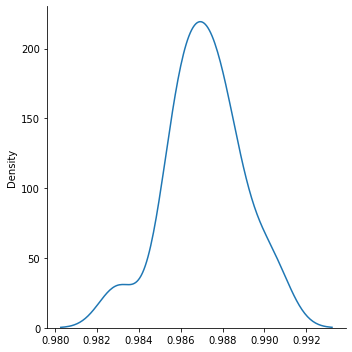

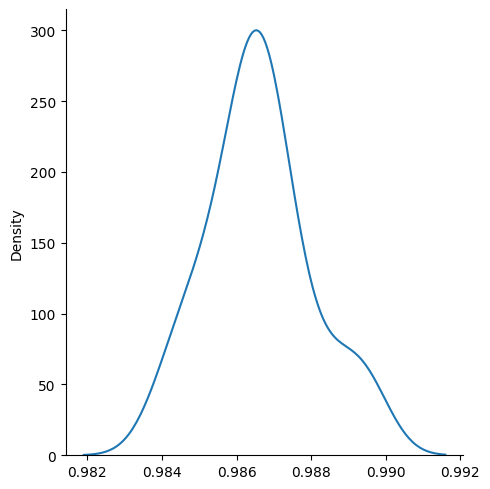

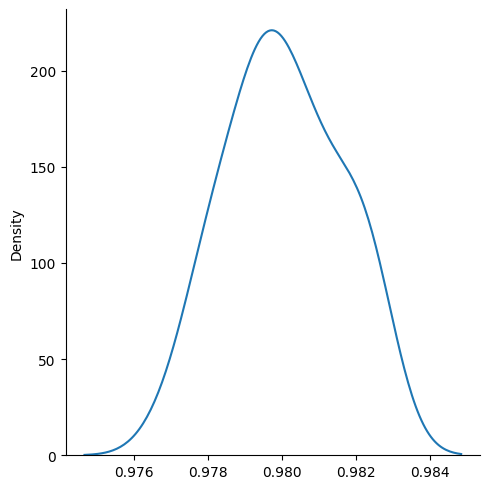

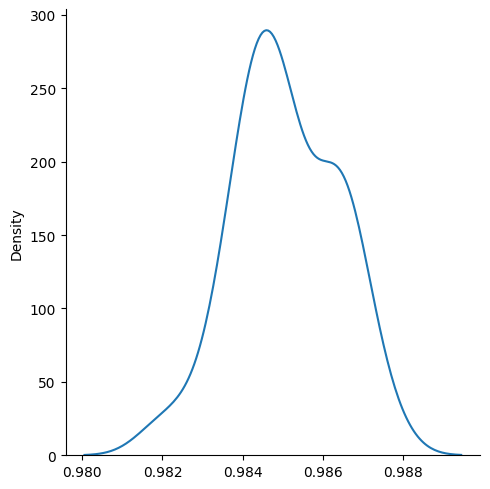

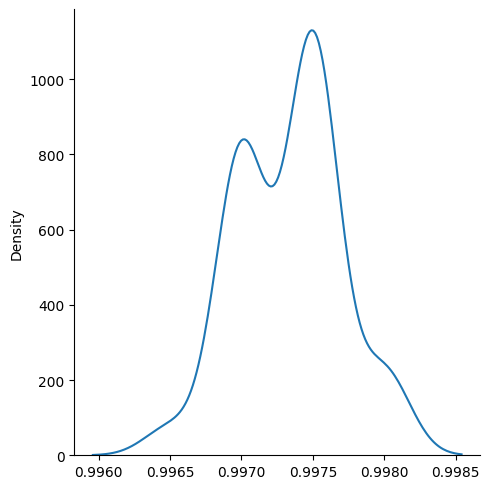

In [18]:
import seaborn as sns
sns.displot(resultados_arvore_decisao, kind= "kde");

sns.displot(resultados_random_forest, kind= "kde");

sns.displot(resultados_knn, kind= "kde");

sns.displot(resultados_svm, kind= "kde");

sns.displot(resultados_rede_neural, kind= "kde");

# TESTE: **ANOVA** e de **TUKEY** (Só é possivel em dados que estejam em uma distribuição normal, usando o teste de shapiro)


In [19]:
from scipy.stats import f_oneway

In [20]:

_, p = f_oneway(resultados_arvore_decisao, resultados_random_forest, resultados_knn, resultados_svm, resultados_rede_neural)

alpha = 0.05
if p <= alpha:
    print("Hipotese nula rejeitada. Dados são diferentes")
else:
    print("Hipótese alternativa rejeitada. Resultados são iguais")
#RESPOSTA: Hipotese nula rejeitada. Dados são diferentes. 
#Significa que os resultados da arvore é diferente do random forest, que é diferente do knn e assim por diante. 
#Chegando a conclusão que os dados são diferentes, agora pode aplicar o teste de Tukey, para saber qual é o melhor algoritmo. 

Hipotese nula rejeitada. Dados são diferentes


In [21]:

resultados_algoritmos = {"Accuracy": np.concatenate([resultados_arvore_decisao, resultados_random_forest, resultados_knn, resultados_svm, resultados_rede_neural]),
                          "Algoritmo": ['Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão','Árvore de decisão',
                                        'Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest','Random forest',
                                        'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                                        'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM',
                                        'Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural','Rede neural']}


In [22]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [27]:
resultados_df

,Accuracy,Algoritmo
0,0.9860,Árvore de decisão
1,0.9855,Árvore de decisão
2,0.9905,Árvore de decisão
3,0.9875,Árvore de decisão
4,0.9880,Árvore de decisão
...,...,...
145,0.9975,Rede neural
146,0.9970,Rede neural
147,0.9970,Rede neural
148,0.9975,Rede neural


In [28]:
resultados_df.head(30)

,Accuracy,Algoritmo
0,0.9860,Árvore de decisão
1,0.9855,Árvore de decisão
2,0.9905,Árvore de decisão
3,0.9875,Árvore de decisão
4,0.9880,Árvore de decisão
5,0.9890,Árvore de decisão
6,0.9880,Árvore de decisão
7,0.9875,Árvore de decisão
8,0.9855,Árvore de decisão
9,0.9870,Árvore de decisão


In [26]:
resultados_df.head(30).mean()

C:\Users\kenne\AppData\Local\Temp\ipykernel_11960\2344712514.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultados_df.head(30).mean()


Accuracy    0.987117
dtype: float64

In [29]:
resultados_df.tail(30)

,Accuracy,Algoritmo
120,0.9975,Rede neural
121,0.9980,Rede neural
122,0.9975,Rede neural
123,0.9970,Rede neural
124,0.9980,Rede neural
125,0.9975,Rede neural
126,0.9970,Rede neural
127,0.9975,Rede neural
128,0.9970,Rede neural
129,0.9975,Rede neural


In [24]:
resultados_df.tail(30).mean()


C:\Users\kenne\AppData\Local\Temp\ipykernel_11960\3903935635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resultados_df.tail(30).mean()


Accuracy    0.997333
dtype: float64

# APLICAÇÃO DO TESTE DE TUKEY

In [30]:
from statsmodels.stats.multicomp import MultiComparison


compara_algoritmos = MultiComparison(resultados_df["Accuracy"], resultados_df["Algoritmo"])
teste_estatistico = compara_algoritmos.tukeyhsd()
print (teste_estatistico) #True =  Algoritmos possuem diferenças estatisticas significativas
                          #False = Algoritmos não são estatisticamente diferentes. 

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1          group2      meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
          KNN     Random forest   0.0065    0.0  0.0056  0.0075   True
          KNN       Rede neural   0.0173    0.0  0.0163  0.0183   True
          KNN               SVM    0.005    0.0   0.004   0.006   True
          KNN Árvore de decisão   0.0071    0.0  0.0061   0.008   True
Random forest       Rede neural   0.0107    0.0  0.0098  0.0117   True
Random forest               SVM  -0.0015 0.0002 -0.0025 -0.0006   True
Random forest Árvore de decisão   0.0005 0.5828 -0.0005  0.0015  False
  Rede neural               SVM  -0.0123    0.0 -0.0132 -0.0113   True
  Rede neural Árvore de decisão  -0.0102    0.0 -0.0112 -0.0092   True
          SVM Árvore de decisão   0.0021    0.0  0.0011   0.003   True
----------------------------------------------------------------------


In [31]:
resultados.mean()

Arvore de Decisão    0.987117
Random forest        0.986600
KNN                  0.980050
SVM                  0.985067
Rede neural          0.997333
dtype: float64

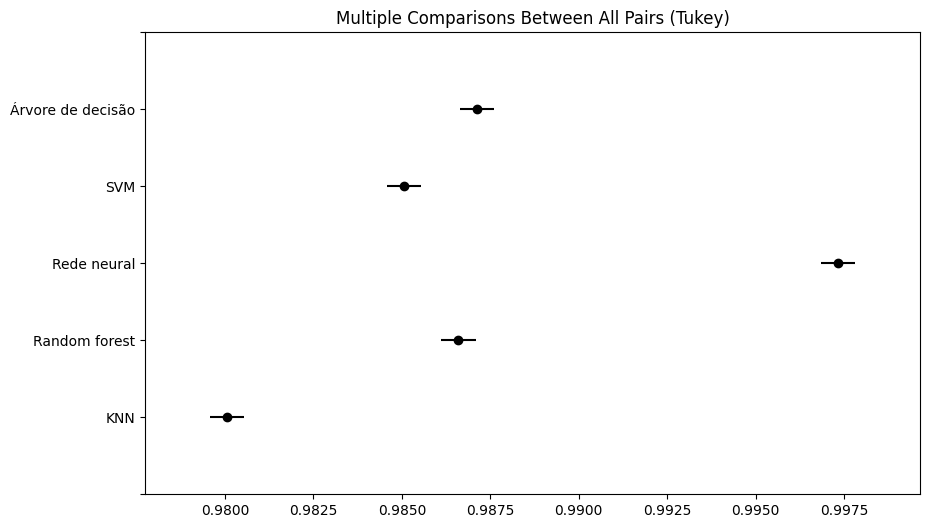

In [32]:
teste_estatistico.plot_simultaneous(); #Grafico mostrando a superioridade dos algoritmos. REDE NEURAL melhor que todos os outros! 

# FIM